In [39]:
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

In [40]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

# №1

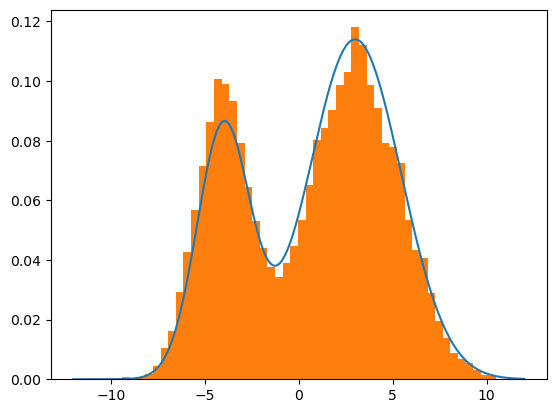

In [41]:
def proposal(current, sigma, **kwargs):
    _ = kwargs
    current = np.asarray(current)
    sigma = np.asarray(sigma)
    return current + sigma * np.random.randn(*current.shape)

def value(theta, **kwargs):
    _ = kwargs
    return 0.3*norm(-4, np.sqrt(2)).pdf(theta) + 0.7*norm(3, np.sqrt(6)).pdf(theta)

post = metroplis(-0.5, value, proposal, 30000, sigma=0.5)
x = np.linspace(-12, 12, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)
fig, ax = plt.subplots(1)
fig.patch.set_facecolor('xkcd:white')
plt.plot(x, y)
plt.hist(post, bins=50, density=True)
plt.show()

# №2

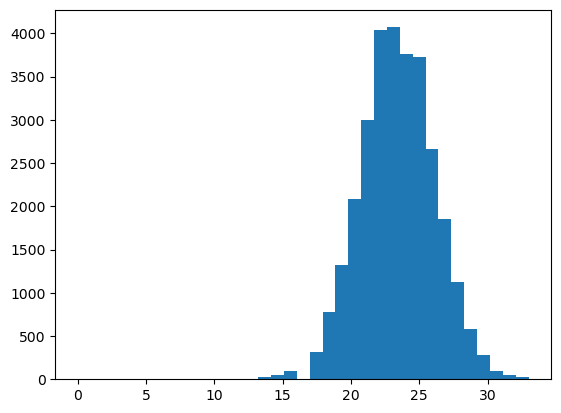

En(e)= 23.319156028132397


In [42]:
def G(graph, n):
    if graph[n[0], n[1]]:
        return True
    else:
        r, c = range(10), range(10)
        M = [[-1,0],[0,-1],[0,1],[1,0]]
        for i in M:
            ny = n[1]+i[0]
            nx = n[0]+i[1]
            if ny in r and nx in c:
                if graph[nx, ny]:
                    return False
        return True 
     
graphs=[]
graphs.append(np.zeros((10, 10)))
for i in range(30000):
    graph=np.zeros((10,10))
    n=np.random.randint(10, size=2)
    if G(graphs[-1], n) and np.random.rand()>0.5:
        if graphs[-1][n[0], n[1]]:
            graph[n[0], n[1]] = -1
        else:
            graph[n[0], n[1]] = 1
    graphs.append(graphs[-1]+graph)
n_=[]
for i in graphs:
    n_.append(np.sum(i))
m=np.asarray(n_).mean()
fig, ax = plt.subplots(1)
fig.patch.set_facecolor('xkcd:white')
plt.hist(n_, bins=35)
plt.show()
print('En(e)=',m)